In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "vk9qCD9Ia25EvbwiRHrK8kn2f"
Consumer_Secret_Key = "aQV1MaIWMLhVmVFKAoY2lQTJnZ1Oc4idFimDeUDQ2OKyglTgI6"
Access_Token = "1236192381872947200-pLZGzNZgSAZJqvk7gcmgMnHCa2DhpZ"
Access_Token_Secret = "XJvtrFU9lVVx8L1arOHaw12wvSdQxQZOcVy1GTWFhJvny"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [4]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [5]:
posts = api.user_timeline(screen_name="ShopeeID", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @ddeonugff Kalo cepet ntar ga surprise dong 😋😋^VZ

2) @vvalen_nn Siap Kakk, mimin keep dulu yaah jawaban kamu :) ^HF

3) @purplenhypen Mana nih kak Engene lainnya? mimin masih tungguin lho sebelum kasih pengumuman hihi😃 ^JK

4) @vitlevitaa jalan-jalan ke sentul, memang kakak mantul   :)^SF

5) @jayhoonlvs tjakeppppp👌 ^SN



In [6]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,@ddeonugff Kalo cepet ntar ga surprise dong 😋😋^VZ
1,"@vvalen_nn Siap Kakk, mimin keep dulu yaah jaw..."
2,@purplenhypen Mana nih kak Engene lainnya? mim...
3,"@vitlevitaa jalan-jalan ke sentul, memang kaka..."
4,@jayhoonlvs tjakeppppp👌 ^SN


In [7]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Kalo cepet ntar ga surprise dong 😋😋^VZ
1,"_nn Siap Kakk, mimin keep dulu yaah jawaban ka..."
2,Mana nih kak Engene lainnya? mimin masih tung...
3,"jalan-jalan ke sentul, memang kakak mantul ..."
4,tjakeppppp👌 ^SN
...,...
195,Yakin banget nih kak sama jawabannya? 😁^VZ
196,Kerennnn kamu kak super detail yaw 😍^PI
197,Wih saking semangatnya jawab A kalo dipanjang...
198,Hihi shiap kak 🤗 ^YD


In [8]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Kalo cepet ntar ga surprise dong 😋😋^VZ,0.000000,0.000000
1,"_nn Siap Kakk, mimin keep dulu yaah jawaban ka...",1.000000,0.500000
2,Mana nih kak Engene lainnya? mimin masih tung...,0.000000,0.000000
3,"jalan-jalan ke sentul, memang kakak mantul ...",1.000000,0.500000
4,tjakeppppp👌 ^SN,0.000000,0.000000
...,...,...,...
195,Yakin banget nih kak sama jawabannya? 😁^VZ,0.000000,0.000000
196,Kerennnn kamu kak super detail yaw 😍^PI,0.666667,0.333333
197,Wih saking semangatnya jawab A kalo dipanjang...,0.000000,0.000000
198,Hihi shiap kak 🤗 ^YD,0.000000,0.000000


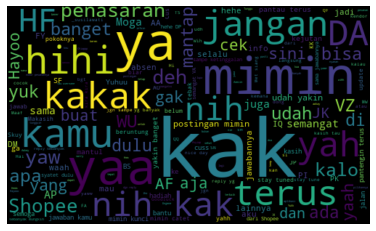

In [9]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Kalo cepet ntar ga surprise dong 😋😋^VZ,0.000000,0.000000,Neutral
1,"_nn Siap Kakk, mimin keep dulu yaah jawaban ka...",1.000000,0.500000,Positive
2,Mana nih kak Engene lainnya? mimin masih tung...,0.000000,0.000000,Neutral
3,"jalan-jalan ke sentul, memang kakak mantul ...",1.000000,0.500000,Positive
4,tjakeppppp👌 ^SN,0.000000,0.000000,Neutral
...,...,...,...,...
195,Yakin banget nih kak sama jawabannya? 😁^VZ,0.000000,0.000000,Neutral
196,Kerennnn kamu kak super detail yaw 😍^PI,0.666667,0.333333,Positive
197,Wih saking semangatnya jawab A kalo dipanjang...,0.000000,0.000000,Neutral
198,Hihi shiap kak 🤗 ^YD,0.000000,0.000000,Neutral


In [11]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) __yhp Jangan galak dong park jimin :( ^VZ

2)   Duhhh maapin ya Kak. Mimin khilaf 🙏^DA

3)  Hai Kak, so sorry jadi ga nyaman kak jangan cemas dulu ya buat dibantu cek sama mimin yuk kasih tau username dan nomor pesanannya ke DM. Makasih 🙏^PI

4)  hi kak sorry banget ya, setelah mimin cek pesanan kamu masih dalam proses pengiriman nih. Untuk estimasi pesanan sampai 18-01-2021.  Jika kamu ada kendala atau pertanyaan lain perihal shopee kamu bisa hubungi aku via dm ya kak 🙏 ^AF



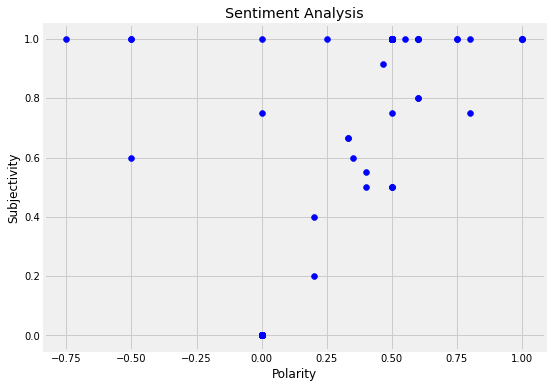

In [12]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

5.0

In [ ]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

0.5

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     189
Positive     10
Negative      1
Name: Analysis, dtype: int64

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     189
Positive     10
Negative      1
Name: Analysis, dtype: int64

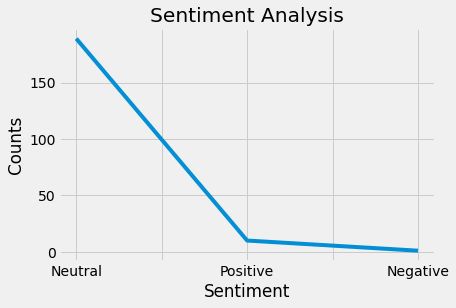

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()

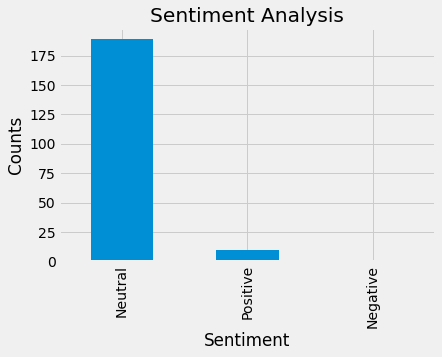

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()